
##### 1. Processing dan visualisasi data diabetes dengan imputasi missing value dengan mean, median, dan modus


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler  
from imblearn.over_sampling import SMOTE 
from wordcloud import WordCloud 

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [3]:
missing_values = data.isnull().sum()

features = data.columns
print('Shape:', data.shape)
print(len(features), 'features')
print(f'{features}')
print(f'dataset diabetes: {data.head()}')
print(f'Missing values: {missing_values}')
print(f'Missing values percentage: {(missing_values / len(data)) * 100}')

#imputasi missing value dengan mean
data_mean = data.fillna(data.mean())
print(f'imputasi missing values dengan mean: {data_mean.head(10)}')

#imputasi missing value dengan median
data_median = data.fillna(data.median())
print(f'imputasi missing values dengan  median: {data_median.head(10)}')
#imputasi missing value dengan modus
data_modus = data.fillna(data.mode().iloc[0]) 
print(f'imputasi missing values dengan  modus: {data_modus.head(10)}') 

Shape: (768, 9)
9 features
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
dataset diabetes:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   NaN        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                       NaN  33.0        1  
Missing values: Pregnancies                  77
Glucose                     115
BloodPressu

##### 2. Cek korelasi antar variabel dengan heatmap

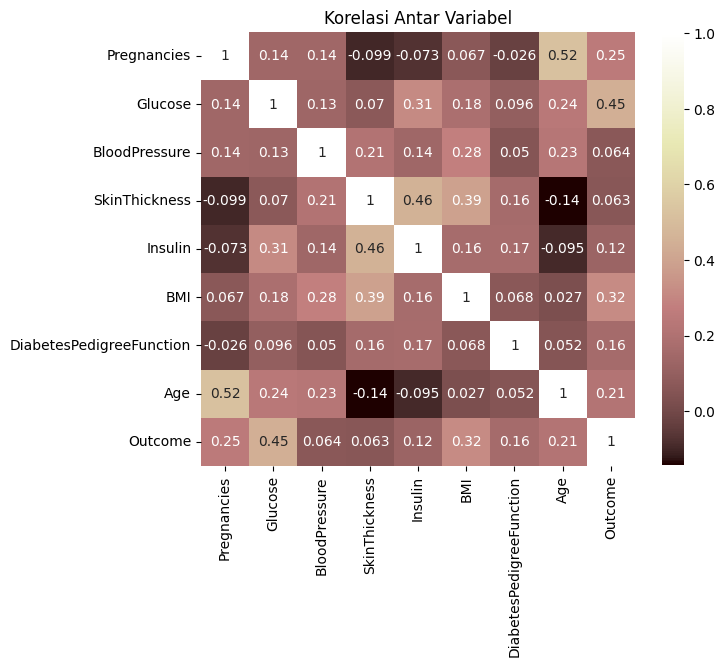

In [4]:
plt.figure(figsize=(7, 7))
korelasi = data.corr()
sns.heatmap(korelasi, annot=True, cmap='pink', square=True, cbar_kws={"shrink": .8})
plt.title('Korelasi Antar Variabel')
plt.show()

##### 3. Lakukan imbalance handling dengan undersampling

In [10]:
from sklearn.utils import resample

mayorClass = data[data['Outcome'] == 0]
minorClass = data[data['Outcome'] == 1]

mayorClassUndersampling = resample(mayorClass, 
                                       replace=False,    
                                       n_samples=len(minorClass), #berfungsi membuat dataset lebih seimbang 
                                       random_state=42)  

data_balanced = pd.concat([mayorClassUndersampling, minorClass])

data_balanced['Outcome'].value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

##### 4. Scaling dengan robust scaler

In [12]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

X = data_balanced.drop('Outcome', axis=1)  
y = data_balanced['Outcome']                 

robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
df_robust_scaled = pd.DataFrame(X_robust_scaled, columns=X.columns)
df_robust_scaled['Outcome'] = y.values
df_robust_scaled.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.4,-0.545455,-0.125,0.50000,NaN,NaN,-0.391252,-0.0625,0
1,0.4,NaN,-1.500,-0.75000,-0.130769,0.121212,0.668287,-0.3750,0
2,0.0,-0.227273,-0.875,0.21875,0.207692,-0.387879,0.123937,-0.5625,0
3,-0.2,0.181818,0.750,-0.75000,-0.130769,-0.569697,-0.230863,-0.2500,0
4,0.8,-0.431818,0.125,0.50000,NaN,0.545455,-0.425273,NaN,0


#### minmax

In [15]:
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
data_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)
data_minmax_scaled['Outcome'] = y.values
data_minmax_scaled.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.487437,0.614035,0.404040,NaN,NaN,0.059688,0.176471,0
1,0.294118,NaN,0.421053,0.000000,0.000000,0.502235,0.253898,0.078431,0
2,0.176471,0.557789,0.508772,0.313131,0.081031,0.439642,0.154120,0.019608,0
3,0.117647,0.648241,0.736842,0.000000,0.000000,0.417288,0.089087,0.117647,0
4,0.411765,0.512563,0.649123,0.404040,NaN,0.554396,0.053452,NaN,0
5,0.058824,NaN,0.649123,0.363636,NaN,0.414307,0.007127,0.176471,0
6,0.058824,0.597990,0.385965,0.474747,0.116022,NaN,0.087305,0.078431,0
7,0.058824,0.527638,NaN,0.000000,0.000000,NaN,0.045880,0.000000,0
8,0.058824,0.482412,NaN,0.000000,0.000000,0.333830,0.054788,0.117647,0
9,0.176471,0.653266,0.561404,0.000000,0.000000,0.344262,0.102450,0.019608,0
